# imputation

In [255]:
# to impute or not to impute
# corruption mode: data missing
import matplotlib.pyplot as plt
import numpy as np

vehicle_missing_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
vehicle_missing_means = [
     403.30447916666674,  # 0.1
     396.4007291666667,  # 0.2
     398.4011458333333,  # 0.3
     381.7394791666667,  # 0.4
     376.3256250000001,  # 0.5
     371.30281249999996,  # 0.6
     348.5780208333333,  # 0.7
     292.53666666666663,  # 0.8
     231.55927083333341,  # 0.9
     ]
vehicle_missing_stds = [
    5.0368510416667,  # 0.1
    7.9236527912862185,  # 0.2
    8.967155333333702,  # 0.3
    8.437142545797576,  # 0.4
    9.623213333000054,  # 0.5
    10.045258008268842,  # 0.6
    13.250066782785062,  # 0.7
    26.440728065622366, # 0.8
    47.59302766017599, # 0.9
]

insert_noise_ratios = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 
                       0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 
                       0.20, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29,
                       0.30]
insert_noise_means = [
     413.97072916666673, # 0.0
     367.65947916666676,  # 0.01
     379.0395833333334,  # 0.02
     393.7338541666666,  # 0.03
     355.7865624999999,  # 0.04
     384.08416666666665,  # 0.05
     387.7425,  # 0.06
     343.7673958333333,  # 0.07
     368.27104166666675,  # 0.08
     385.09312499999993,  # 0.09
     326.85291666666666,  # 0.10
     338.34822916666667,  # 0.11
     317.26322916666663,  # 0.12
     345.78468749999996,  # 0.13
     285.46322916666674,  # 0.14
     322.6987499999999,  # 0.15
     298.40874999999994,  # 0.16
     128.21802083333338,  # 0.17
     264.28645833333326,  # 0.18
     274.4649999999999,  # 0.19
     247.4803125,  # 0.20
     171.3344791666667,  # 0.21
     228.54052083333326,  # 0.22
     -183.35822916666663,  # 0.23
     297.84552083333335,  # 0.24
     132.46177083333333,  # 0.25
     132.46177083333333,  # 0.26
     183.81072916666673,  # 0.27
     216.13947916666658,  # 0.28
     152.8734375,  # 0.29
     -65.793125,  # 0.30
     ]

imputation_advantage = np.zeros((len(vehicle_missing_ratios), len(insert_noise_ratios)))
for i, vehicle_missing_ratio in enumerate(vehicle_missing_ratios):
    for j, insert_noise_ratio in enumerate(insert_noise_ratios):
        imputation_advantage[i, j] = insert_noise_means[j] - vehicle_missing_means[i]
print(imputation_advantage)

[[  10.66625     -35.645       -24.26489583   -9.570625    -47.51791667
   -19.2203125   -15.56197917  -59.53708333  -35.0334375   -18.21135417
   -76.4515625   -64.95625     -86.04125     -57.51979167 -117.84125
   -80.60572917 -104.89572917 -275.08645833 -139.01802083 -128.83947917
  -155.82416667 -231.97       -174.76395833 -586.66270833 -105.45895833
  -270.84270833 -270.84270833 -219.49375    -187.165      -250.43104167
  -469.09760417]
 [  17.57        -28.74125     -17.36114583   -2.666875    -40.61416667
   -12.3165625    -8.65822917  -52.63333333  -28.1296875   -11.30760417
   -69.5478125   -58.0525      -79.1375      -50.61604167 -110.9375
   -73.70197917  -97.99197917 -268.18270833 -132.11427083 -121.93572917
  -148.92041667 -225.06625    -167.86020833 -579.75895833  -98.55520833
  -263.93895833 -263.93895833 -212.59       -180.26125    -243.52729167
  -462.19385417]
 [  15.56958333  -30.74166667  -19.3615625    -4.66729167  -42.61458333
   -14.31697917  -10.65864583  -54.63

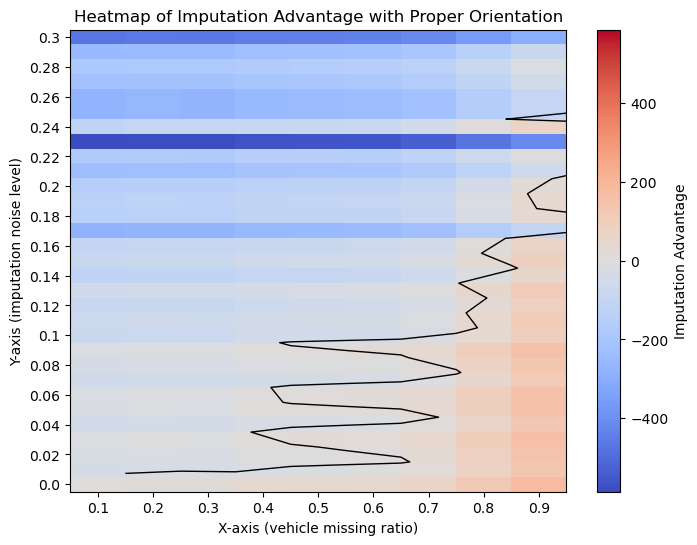

In [256]:
import numpy as np
import matplotlib.pyplot as plt

# Find the absolute maximum to center the colormap at zero
abs_max = np.max(np.abs(imputation_advantage))

# Plotting the heatmap with corrected orientation
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(imputation_advantage.T, cmap="coolwarm", aspect='auto', interpolation='nearest', origin='lower',vmin=-abs_max, vmax=abs_max)

# Adding a colorbar for reference
plt.colorbar(heatmap, label='Imputation Advantage')

# Drawing a contour line to separate positive and negative areas
contour = plt.contour(imputation_advantage.T, levels=[0], colors='black', linewidths=1.0, origin='lower')

# Adding labels and title
plt.title('Heatmap of Imputation Advantage with Proper Orientation')
plt.xticks(np.arange(len(vehicle_missing_ratios)), vehicle_missing_ratios)
plt.yticks(list(np.arange(len(insert_noise_ratios)))[::2], insert_noise_ratios[::2])
plt.xlabel('X-axis (vehicle missing ratio)')
plt.ylabel('Y-axis (imputation noise level)')

# Display the plot
plt.show()

parameters:  0.001900955736430751 5.181336723489101


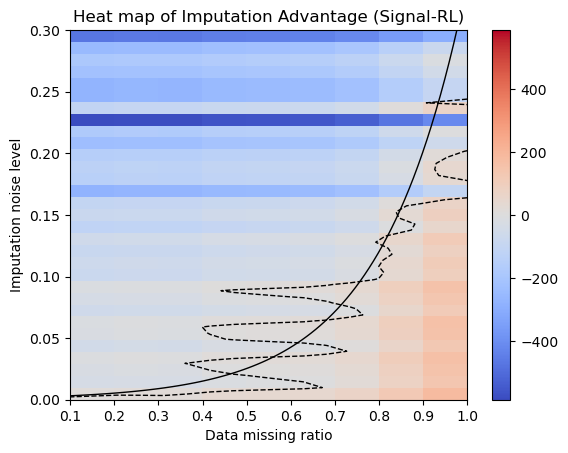

In [257]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
from scipy.optimize import curve_fit

# Your data
vehicle_missing_ratios = np.linspace(0.1, 1.0, imputation_advantage.shape[0])
insert_noise_ratios = np.linspace(0.00, 0.3, imputation_advantage.shape[1])

# Interpolation to increase resolution
zoom_factor = 2
interpolated_data = zoom(imputation_advantage.T, zoom=zoom_factor, order=1)

# Create coordinate grids for alignment
x = np.linspace(vehicle_missing_ratios.min(), vehicle_missing_ratios.max(), interpolated_data.shape[1])
y = np.linspace(insert_noise_ratios.min(), insert_noise_ratios.max(), interpolated_data.shape[0])
X, Y = np.meshgrid(x, y)

# Plot heatmap
#plt.figure(figsize=(8, 6))
heatmap = plt.imshow(imputation_advantage.T, cmap="coolwarm", aspect='auto', interpolation='nearest', 
                     origin='lower', vmin=-abs_max, vmax=abs_max,
                     extent=[vehicle_missing_ratios.min(), vehicle_missing_ratios.max(),
                                             insert_noise_ratios.min(), insert_noise_ratios.max()])

# Contour on interpolated data with proper grid alignment
contour = plt.contour(X, Y, interpolated_data, levels=[0], colors='black', linewidths=1, linestyles='dashed')
#linestyles='dashed'


# fit by exponential curve
all_x = [0, 0.1,   0.2,   0.4,  0.5,  0.6,  0.7,  0.9]
all_y = [0, 0.005, 0.006, 0.01, 0.02, 0.04, 0.08, 0.20]

all_x = np.array(all_x)
all_y = np.array(all_y)

# Example exponential function to fit
def func(x, a, b):
    return a * np.exp(b * x)

all_x = np.array(all_x)
all_y = np.array(all_y)

# Fit the exponential function to the data
popt, _ = curve_fit(func, all_x, all_y)

# Get the fitted parameters
a, b = popt
print("parameters: ", a, b)
fitted_line_x = np.linspace(0.1, 1.0, imputation_advantage.shape[0] * 10)
# Generate fitted y-values for plotting
fitted_line_y = func(np.array(fitted_line_x), *popt)

plt.plot(fitted_line_x, fitted_line_y, color='black', linewidth=1, linestyle='solid')


# Add colorbar and labels
plt.ylim(0, 0.3)
plt.colorbar(heatmap)
plt.title('Heat map of Imputation Advantage (Signal-RL)')
plt.xlabel('Data missing ratio')
plt.ylabel('Imputation noise level')

# Show the plot
plt.show()


# Impute by content fill

In [258]:
import re
from collections import defaultdict

# Initialize dictionary to store the data
data = defaultdict(lambda: defaultdict(dict))

# Parse the file
corruption_ratios = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
no_imputation = [
     403.30447916666674,  # 0.1
     396.4007291666667,  # 0.2
     398.4011458333333,  # 0.3
     381.7394791666667,  # 0.4
     376.3256250000001,  # 0.5
     371.30281249999996,  # 0.6
     348.5780208333333,  # 0.7
     292.53666666666663,  # 0.8
     231.55927083333341,  # 0.9
     ]
context_fill_imputation = [404.1641666666666,  # 0.1
                           399.69958333333324,  # 0.2
                           392.04468749999995,  # 0.3
                           384.3675000000001,  # 0.4
                           360.3343749999998, # 0.5
                           351.9978125, # 0.6
                           327.6951041666666, # 0.7
                           265.6808333333334, # 0.8
                           215.69822916666672, # 0.9
                           ]  


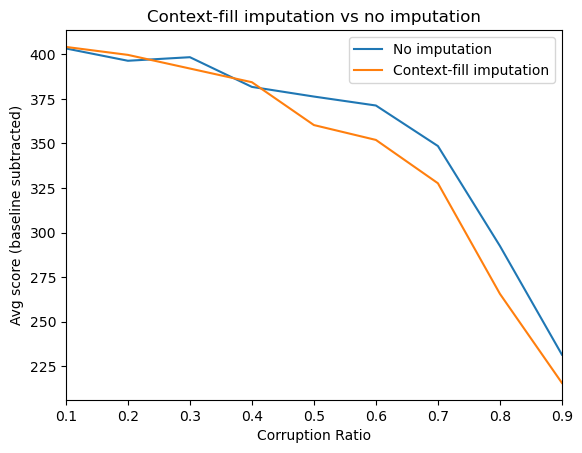

In [259]:
# plot
import numpy as np        
import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 6))
plt.plot(corruption_ratios, no_imputation, label='No imputation')
plt.plot(corruption_ratios, context_fill_imputation, label='Context-fill imputation')
plt.xlabel('Corruption Ratio')
plt.ylabel('Avg score (baseline subtracted)')
plt.xlim(0.1, 0.9)
plt.title('Context-fill imputation vs no imputation')
plt.legend()
plt.show()

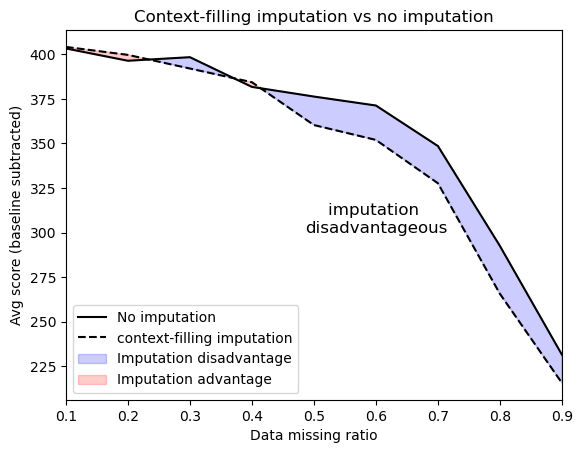

In [260]:
# plot
import numpy as np        
import matplotlib.pyplot as plt

# Assuming corruption_ratios, scores_imputation_none, and scores_imputation_wordvec are defined

plt.plot(corruption_ratios, no_imputation, color='black', linestyle='-', label='No imputation')
plt.plot(corruption_ratios, context_fill_imputation, linestyle='--', label='context-filling imputation', color='black')

# Fill the area between the two curves
plt.fill_between(corruption_ratios, no_imputation, context_fill_imputation, 
                 where=(np.array(no_imputation) > np.array(context_fill_imputation)), 
                 interpolate=True, color='blue', alpha=0.2, label='Imputation disadvantage')

plt.fill_between(corruption_ratios, no_imputation, context_fill_imputation, 
                 where=(np.array(no_imputation) < np.array(context_fill_imputation)), 
                 interpolate=True, color='red', alpha=0.2, label='Imputation advantage')

# Add text annotation
plt.text(0.6, 300, 'imputation \ndisadvantageous', color='black', fontsize=12, ha='center')
#plt.text(0.2, 365, 'imputation \nadvantage', color='black', fontsize=12, ha='center')
#plt.text(0.6, 300, 'imputation \ndisadvantage', color='black', fontsize=12, ha='center')

# Add labels and legend
plt.xlabel('Data missing ratio')
plt.ylabel('Avg score (baseline subtracted)')
plt.xlim(0.1, 0.9)
plt.title('Context-filling imputation vs no imputation')
plt.legend()
plt.show()